<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Robot-Modeling:-Due-10/4/2024" data-toc-modified-id="Robot-Modeling:-Due-10/4/2024-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Robot Modeling: Due 10/4/2024</a></span><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Reading-Assignment" data-toc-modified-id="Reading-Assignment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reading Assignment</a></span></li></ul></li><li><span><a href="#Challenge" data-toc-modified-id="Challenge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Deliverables" data-toc-modified-id="Deliverables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deliverables</a></span></li><li><span><a href="#Appendix:-Reading-the-Romi's-Gyroscope" data-toc-modified-id="Appendix:-Reading-the-Romi's-Gyroscope-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix: Reading the Romi's Gyroscope</a></span></li></ul></div>

# Robot Modeling: Due 10/4/2024

The "robot brain" you built for A04 was not very sophisticated, only reacting to the environment and making decisions based on a simple "desire" to maintain a particular orientation and/or distance with respect to another robot. Using [Dennett's Creatures](https://en.wikibooks.org/wiki/Cognitive_Science:_An_Introduction/Kinds_of_Intelligences) as a guide, we could classify your A04 robot's intelligence as "Darwinian," because the robot acts only based on simple rules and desires, and cannot learn.

Many modern robots have some capacity to learn. We may or may not get to talk about learning in robots in ES302, but suffice it to say that robots that learn *might* be classified as "Skinnerian Creatures" in Dennett's taxonomy.

Modern mobile and manipulator robots also use complex optimization algorithms to *plan* motion intelligently. This means that the robots "try" options for motion and/or action *before they act*. Autonomous vehicles sometimes use a paradigm called [Model Predictive Control](https://sites.lafayette.edu/brownaa/files/2021/01/FontBrown2020_Deercollisions_PREPRINT.pdf) to predict the outcome of a series of inputs, evaluate that outcome, and "tune" behavioral patterns before acting. This gives many modern robots some characteristics of "Popperian Creatures" in Dennett's taxonomy. Quoting [Cognitive Science: An Introduction](https://en.wikibooks.org/wiki/Cognitive_Science:_An_Introduction), we can examine the definition of a Popperian Creature:

> Popperian creatures have all the skills of Skinnerian creatures, but can also consider hypothetical situations and make decisions based on the outcome in their imagination. For example, you might imagine that hot sauce on ice cream would taste bad, so you choose not to eat it. You learned, in this case, from a simulation in your imagination, rather than directly from experience with the environment. This class is named after Karl Popper, a philosopher of science.

The key feature that enables the development of Popperian behavior in a robot is the *internal model*. A robot that has a way to dynamically predict the results of its actions (and those of other agents around it) has the *infrastructure* required to predict the outcomes of future behavior. In doing so, the robot can evaluate these actions and optimize them against an objective function to choose "the best" actions.

## Goal

In this assignment, you will develop a physics-based, dynamic model of the Romi's **angular velocity** and **forward velocity** so that we can give the Romi the ability to predict where it will be given a time history of its motor voltages.

## Reading Assignment

1. [ES103 Summary Resource](https://alexanderallenbrown.github.io/ES302_FA22_Students/01_Background_Resources/01B_ES103_Summary_Resource.html)
2. [Mathematical Modeling Resource](https://alexanderallenbrown.github.io/ES302_FA22_Students/04_Mathematical_Modeling/04_Mathematical_Modeling.html)

# Challenge

1. Beginning with the physics-based model we developed together in class relating Romi motor voltage to forward motion, and using the data you collected for a real Romi in A03, determine estimates for unknown parameters in the model.
2. Scope, Construct, then Evaluate a physics-based differential equation model for the Romi's **turning** behavior. Consider the motor voltage (applied in opposite directions) $V_{turn}$ to be your input, and the Romi's [Yaw Rate](https://en.wikipedia.org/wiki/Yaw_(rotation) to be your model's output. 
3. Determine any unknown parameters in this model using a dataset you collect from a real Romi. You may need to use the Romi's gyroscope (see the [documentation](https://pololu.github.io/romi-32u4-arduino-library/) for the Romi arduino library for help) to measure yaw rate.

# Deliverables

Construct a Google Doc that uses an IEEE-like format (template available [here](https://docs.google.com/document/d/1BMLExxD-IPdg8BpoX1QPa5_iaZHdTEeQ5yxBzSZsEWo/edit)). The document should contain headings:


1. Model Development for Forward Motion
2. Model Scoping for Yaw Rate
3. Model Construction for Yaw Rate
4. Model Evaluation

In section 1, you may leverage the final equation we developed in class as a starting point, and only explain your work to determine parameters. 

In section 2, you should formally scope a model for Romi yaw rate. 

In section 3, you should take the reader through the **major** model construction steps (you do not need to include all of your algebraic manipulations, but you should include an equivalent circuit, element, node, and loop equations you use) and present a final symbolic differential equation. You should also show your work to develop estimates of unknown parameters using a dataset you collect from the robot.

In section 4, you should evaluate your model's external validity by collecting a new yaw rate dataset from the Romi and showing that the model accurately predicts the Romi's motion. You should also collect a new forward velocity dataset from the Romi to test external validity of that model. Briefly comment on the agreement.

This is **not** a process writing assignment, so you will only be graded on content and correctness. Typeset any equations you use, and create any explanatory graphics, tables, and/or plots that you develop as you work. You should be showing your model scoping, construction, and evaluations steps in this document. It's an opportunity to practice typesetting equations and making professional-looking figures, which will help prepare you for your project in ES302.

# Appendix: Reading the Romi's Gyroscope

To build your yaw rate model, you may find it helpful to read yaw rate from the Romi's built-in LSM6 gyro, rather than inferring yaw rate from the Romi's wheel velocities. The following example code can be used to read this gyro, so you can feel free to incorporate it into your data collection code. You will need to install the LSM6 library using the library manager (see screenshot). 
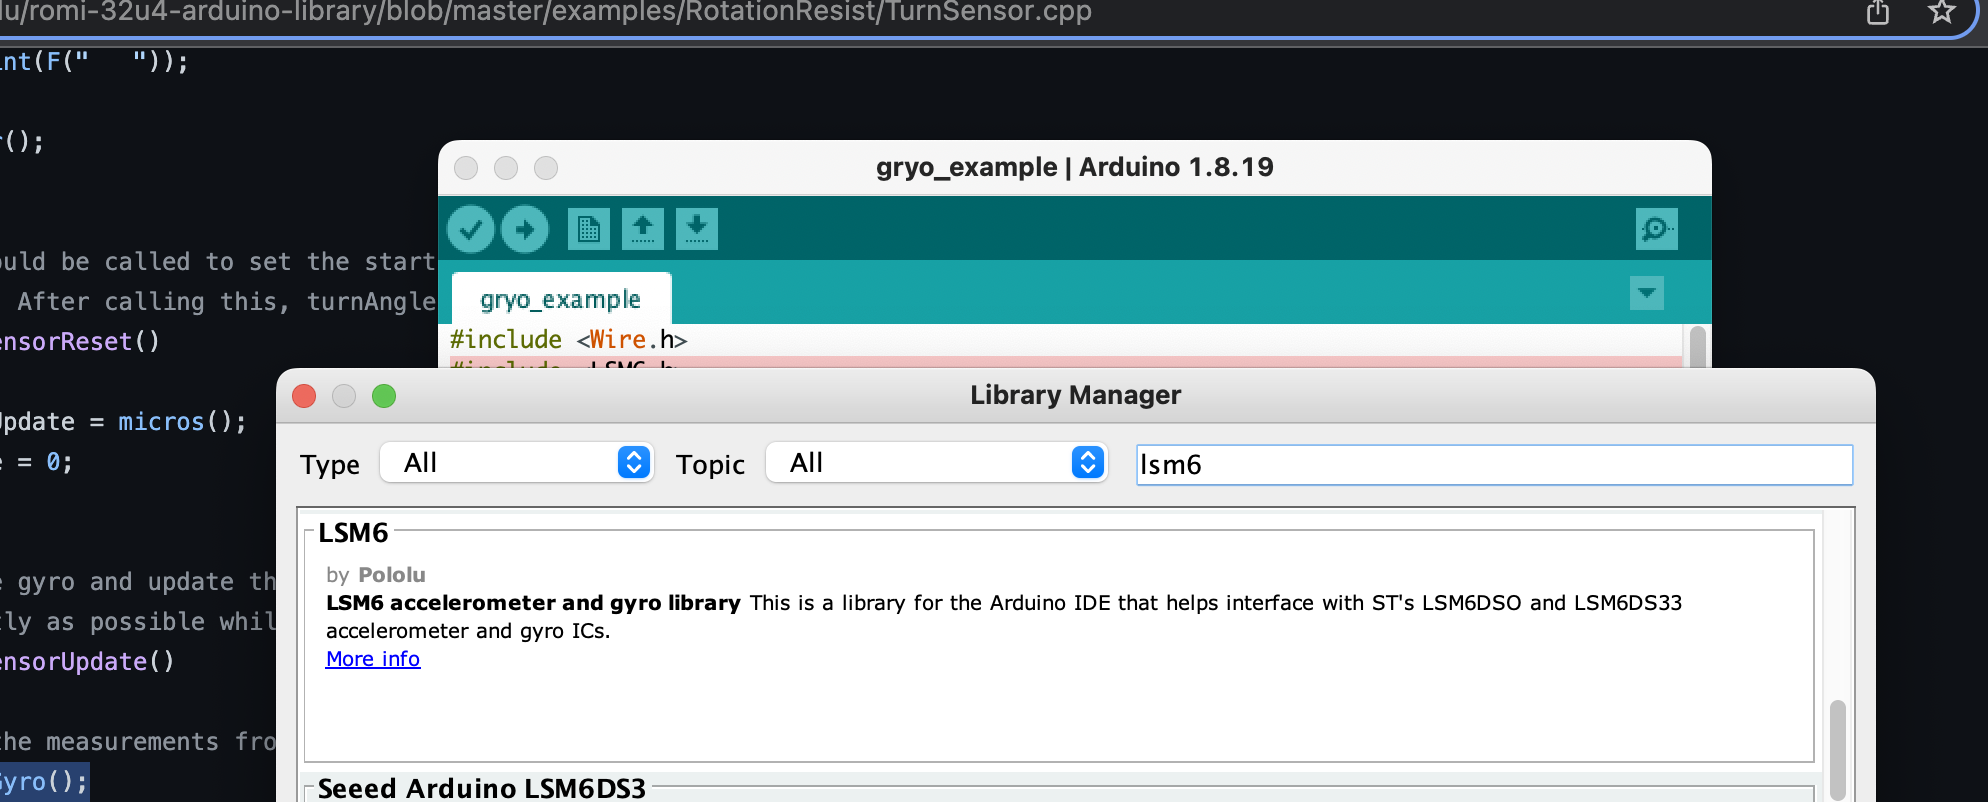

Example code here:

```c++
#include <Wire.h>
#include <LSM6.h>

//declare imu (gyro) object
LSM6 imu;
//The conversion from gyro digits to
// degrees per second (dps) is determined by the sensitivity of
// the gyro: 0.035 degrees per second per digit is what we'll use

void setup(){
  //begin the i2c communication protocol
  Wire.begin();
  //begin communicationw with the IMUI
  imu.init();
  //this enables defaults
  imu.enableDefault();
  // Set the gyro full scale to 1000 dps because the default
  // value is too low, and leave the other settings the same.
  imu.writeReg(LSM6::CTRL2_G, 0b10001000);

  //initialize serial comms
  Serial.begin(115200);
}

void loop() {
  // read data from the gyro
  imu.readGyro();

  //the gyro Z reading is what we want. It is in COUNTS per second.
  //see above (and/or the datasheet) for info on how to convert to rad/s or degrees/s
  Serial.println(imu.g.z);

  //delay a little to give it time
  delay(1);

}
```